For this workshop, you need:

* An Azure Machine Learning workspace. 
* The Azure Machine Learning Python CLI v2 installed.

# Model Training

## 1. Create Compute Cluster

A compute is a designated compute resource where you run your job or host your endpoint. Azure Machine learning supports the following types of compute:

- **Compute instance** - a fully configured and managed development environment in the cloud. You can use the instance as a training or inference compute for development and testing. It's similar to a virtual machine on the cloud.

- **Compute cluster** - a managed-compute infrastructure that allows you to easily create a cluster of CPU or GPU compute nodes in the cloud.

- **Inference cluster** - used to deploy trained machine learning models to Azure Kubernetes Service. You can create an Azure Kubernetes Service (AKS) cluster from your Azure ML workspace, or attach an existing AKS cluster.

- **Attached compute** - You can attach your own compute resources to your workspace and use them for training and inference.

You can create a compute using the Studio, the cli and the sdk.

<hr>

We can create a **compute instance** with cli v2 or sdk v2 using the following syntax:

<center>
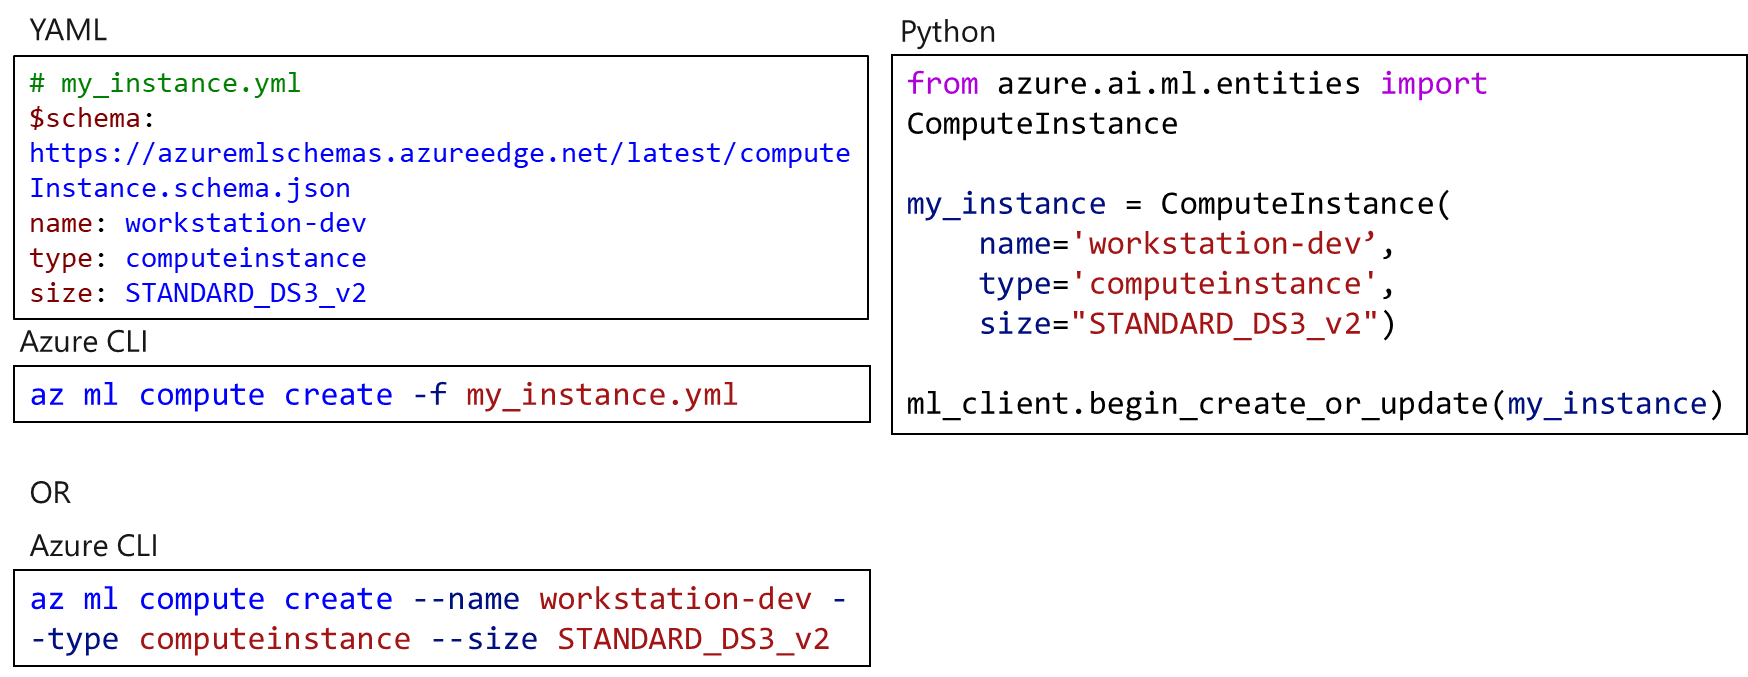
</center>


<hr>

We can create a **compute cluster** with cli v2 or sdk v2 using the following syntax:

<center>
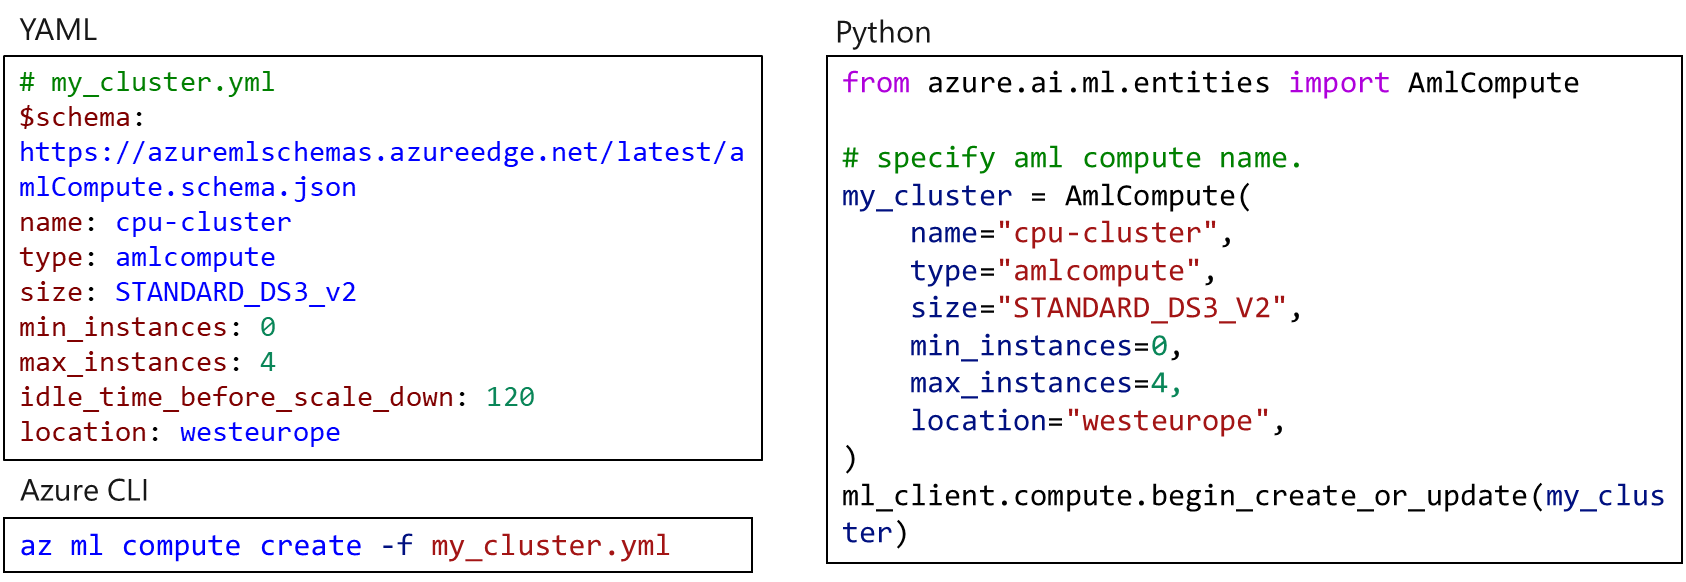
</center>

In [ ]:
# Create train job compute cluster
!az ml compute create --file train/compute.yml

## 2. Register Data Asset


**Datastore** - Azure Machine Learning Datastores securely keep the connection information to your data storage on Azure, so you don't have to code it in your scripts.

An Azure Machine Learning datastore is a **reference** to an **existing** storage account on Azure. The benefits of creating and using a datastore are:
A common and easy-to-use API to interact with different storage type. 
Easier to discover useful datastores when working as a team.
When using credential-based access (service principal/SAS/key), the connection information is secured so you don't have to code it in your scripts.

Supported Data Resources: 

* Azure Storage blob container
* Azure Storage file share
* Azure Data Lake Gen 1
* Azure Data Lake Gen 2
* Azure SQL Database 
* Azure PostgreSQL Database
* Azure MySQL Database

It is not a requirement to use Azure Machine Learning datastores - you can use storage URIs directly assuming you have access to the underlying data.

You can create a datastore using the Studio, the cli and the sdk.

<hr>

We can create a **datastore** with cli v2 or sdk v2 using the following syntax:

<center>
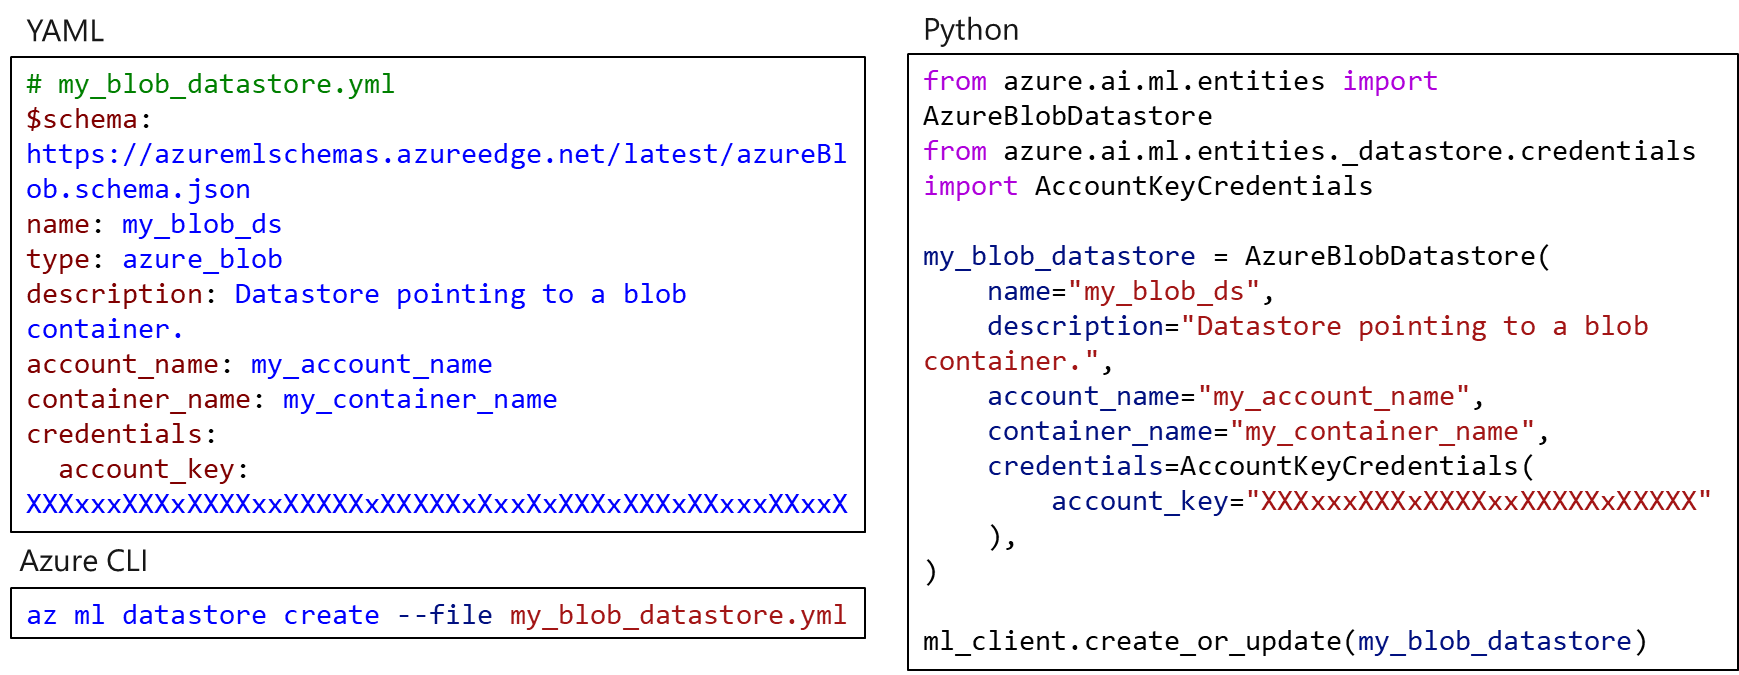
</center>


**Data asset** - Create data assets in your workspace to share with team members, version, and track data lineage.

By creating a data asset, you create a reference to the data source location, along with a copy of its metadata. 

The benefits of creating data assets are:

* You can **share and reuse data** with other members of the team such that they do not need to remember file locations.
* You can **seamlessly access data** during model training (on any supported compute type) without worrying about connection strings or data paths.
* You can **version** the data.

<hr>

We can create a **data asset** with cli v2 or sdk v2 using the following syntax:

<center>
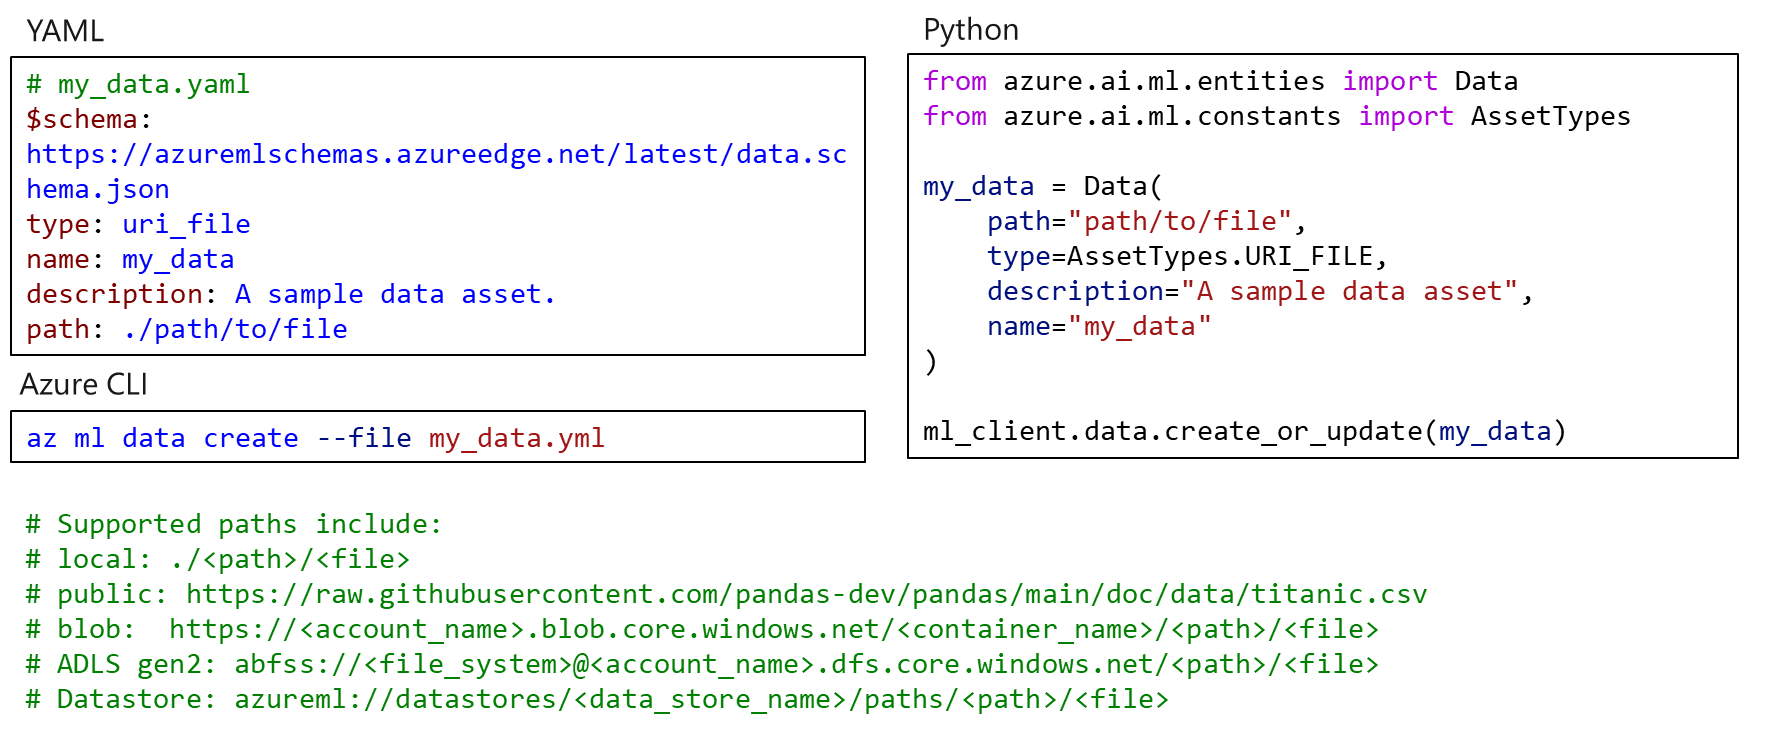
</center>

In [ ]:
# Register data asset 
!az ml data create --file train/data.yml

## 3. Register Train Environment

Azure Machine Learning environments define the execution environments for your **jobs** or **deployments** and encapsulate the dependencies for your code. 

Azure ML uses the environment specification to create the Docker container that your **training** or **scoring code** runs in on the specified compute target.

Create an environment from a
* conda specification
* Docker image
* Docker build context

There are two types of environments in Azure ML: **curated** and **custom environments**. Curated environments are predefined environments containing popular ML frameworks and tooling. Custom environments are user-defined.

We can create a **data asset** with cli v2 or sdk v2 using the following syntax:

<center>
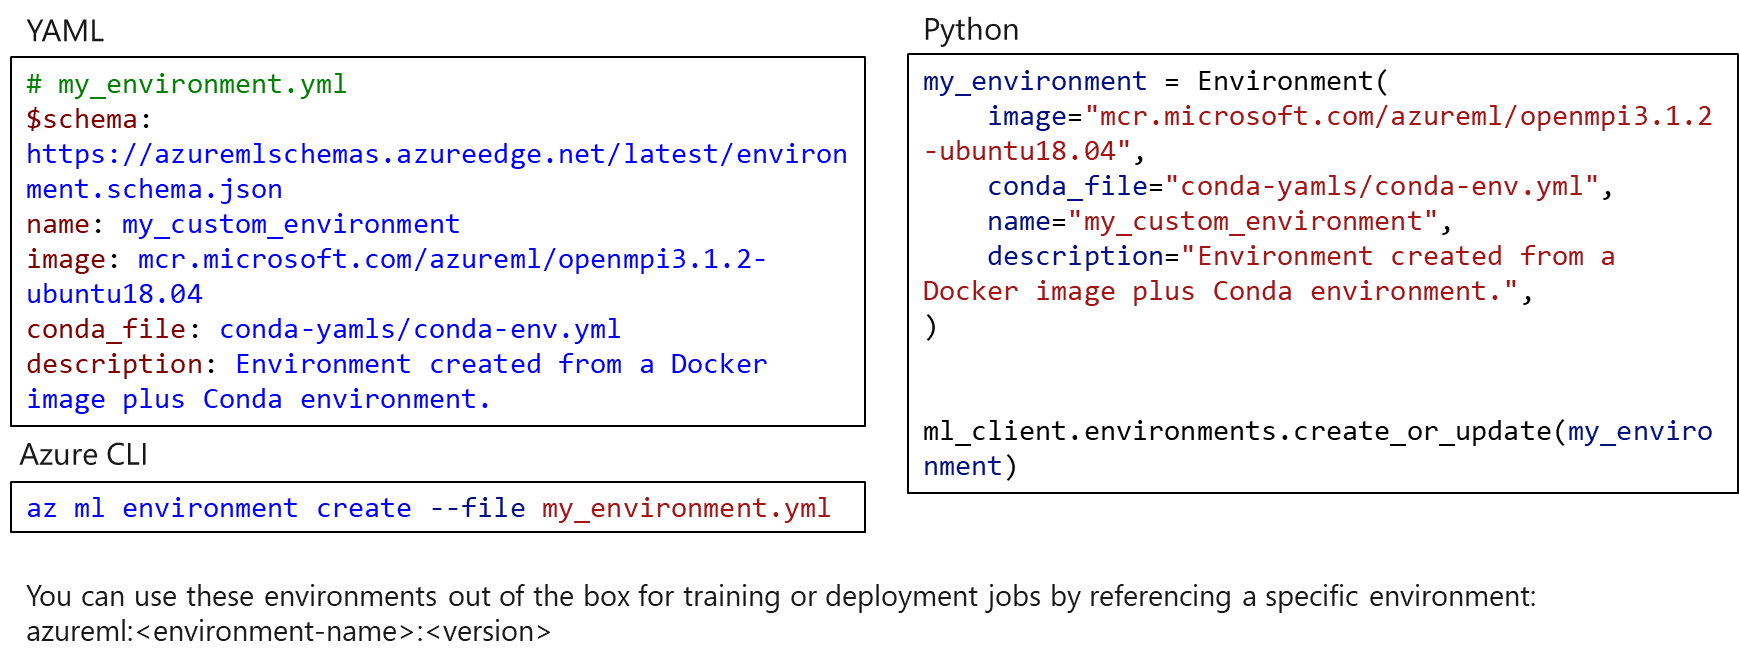
</center>

In [ ]:
# Register train environment 
!az ml environment create --file train/environment.yml

## 4. Create Pipeline Job

In [ ]:
# Create pipeline job
!az ml job create --file train/pipeline.yml

## 5. Create Pipeline with AutoML Job

In [ ]:
# Create pipeline job with automl training job
!az ml job create --file train/pipeline_automl.yml

# Model Online Endpoint

## 1. Create Online Endpoint

In [ ]:
# create online endpoint
az ml online-endpoint create --file deploy/online/online-endpoint.yml

## 2. Create Online Deployment

In [ ]:
# create online deployment
az ml online-deployment create --file deploy/online/online-deployment.yml 

## 3. Allocate Traffic

In [ ]:
# allocate traffic
az ml online-endpoint update --name taxi-online-endpoint --traffic blue=100

## 4. Invoke and Test Endpoint

In [ ]:
# invoke and test endpoint
az ml online-endpoint invoke --name taxi-online-endpoint --request-file ../../data/taxi-request.json

# Model Batch Endpoint

## 1. Create Batch Compute Cluster

In [ ]:
# create compute cluster to be used by batch cluster
az ml compute create -n batch-cluster --type amlcompute --min-instances 0 --max-instances 3

## 2. Create Batch Endpoint

In [ ]:
# create batch endpoint
az ml batch-endpoint create --file deploy/batch/batch-endpoint.yml

## 3. Create Batch Deployment

In [ ]:
# create batch deployment
az ml batch-deployment create --file deploy/batch/batch-deployment.yml --set-default

## 4. Invoke and Test Endpoint

In [ ]:
# invoke and test endpoint
az ml batch-endpoint invoke --name taxi-batch-endpoint --input ../../data/taxi-batch.csv